# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [181]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [182]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=cc049e531057bfdbb4ab12f3a82cff5c&units=metric&q='

In [183]:
cities = ["Lima", "Paris", "London", "Beijing", "Mumbai", "Manila", "New York", "Los Angeles", "Jakarta", "Taipei", "Berlin", "Sao Paulo", "Santiago", "Buenos Aires", "Lima", "Sydney", "Istanbul", "Cairo", "Moscow", "Cape Town"]

# set up lists to hold reponse info
lat = []
lon = []
temp = []
tempmax = []
humid = []
clouds = []
wind = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    tempmax.append(response['main']['temp_max'])
    humid.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    date.append(response['dt'])

print(f"The measurement information received is: {country}")

The measurement information received is: ['PE', 'FR', 'GB', 'CN', 'IN', 'PH', 'US', 'US', 'ID', 'TW', 'DE', 'BR', 'CL', 'AR', 'PE', 'AU', 'TR', 'EG', 'RU', 'ZA']


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [194]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temperature": temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lima,-12.0432,-77.0282,19.10,82,20,4.12,PE,1619218495
1,Paris,48.8534,2.3488,11.36,37,0,5.66,FR,1619218724
2,London,51.5085,-0.1257,6.16,70,47,3.60,GB,1619218729
3,Beijing,39.9075,116.3972,15.09,88,0,2.00,CN,1619218467
4,Mumbai,19.0144,72.8479,28.00,74,100,2.79,IN,1619218722


In [197]:
weather_data.agg(['count', 'mean', 'std', 'min', 'max']).reset_index()

,index,City,Lat,Lng,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,count,20,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20,2.000000e+01
1,min,Beijing,-34.613200,-118.243700,5.520000,22.000000,0.000000,1.000000,AR,1.619218e+09
2,max,Taipei,55.752200,151.207300,28.000000,94.000000,100.000000,6.170000,ZA,1.619219e+09
3,mean,NaN,13.168215,14.987465,16.567000,74.000000,37.900000,3.164000,NaN,1.619219e+09
4,std,NaN,33.353888,80.689239,6.293677,19.352682,39.690778,1.382924,NaN,1.882547e+02


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

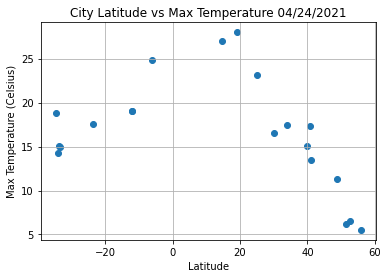

In [204]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature 04/24/2021")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

In [ ]:
Analysis - Max Temperature rises closer to Equator

## Latitude vs. Humidity Plot

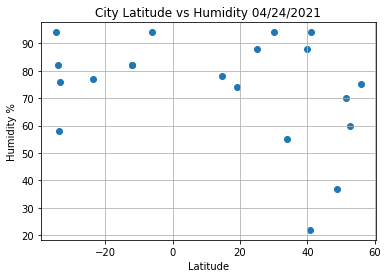

In [206]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity 04/24/2021")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_vs_Humid.png")

# Show plot
plt.show()

In [ ]:
Analysis - Less of a trend for Humidity compared to Temperature vs Latitude

## Latitude vs. Cloudiness Plot

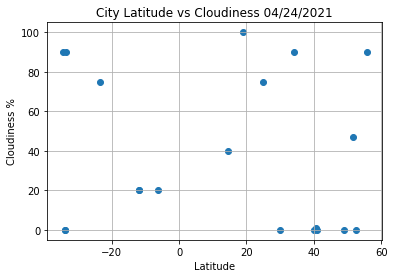

In [207]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness 04/24/2021")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_vs_Cloud.png")

# Show plot
plt.show()

In [ ]:
Analysis - Less of a trend for Cloudiness compared to Temperature vs Latitude

## Latitude vs. Wind Speed Plot

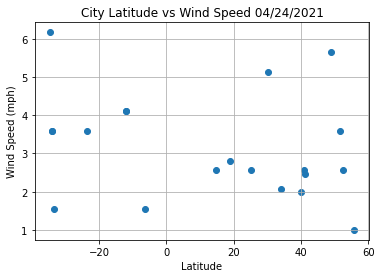

In [208]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed 04/24/2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temp_vs_Wind.png")

# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


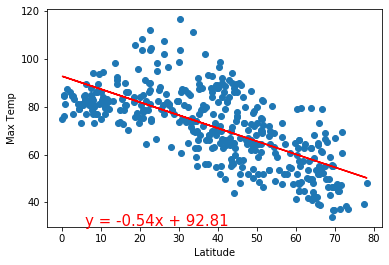

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


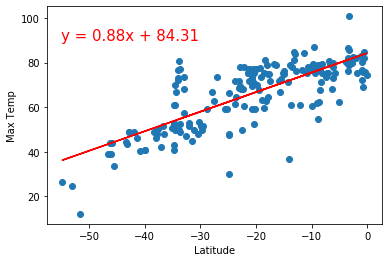

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


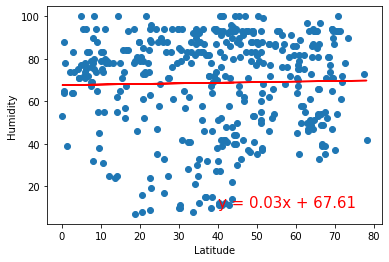

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


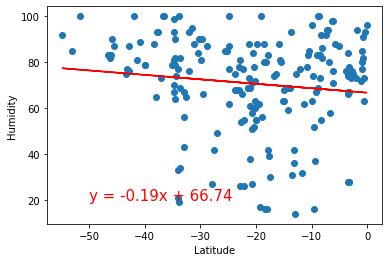

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


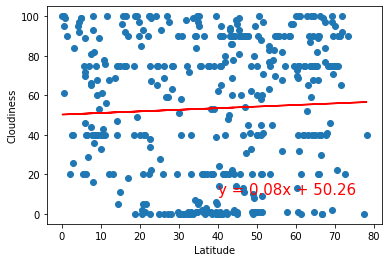

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


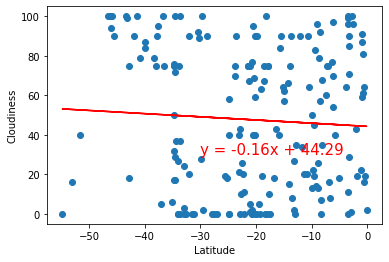

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


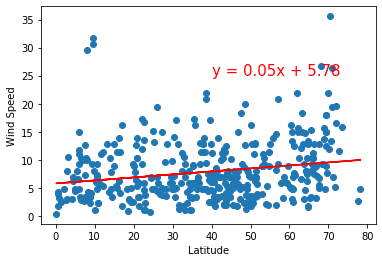

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


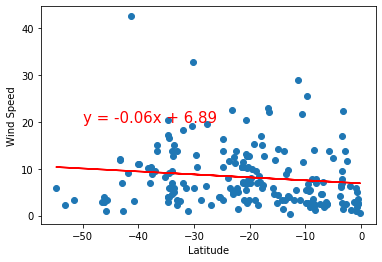